# Import STRIFE code and default arguments

In [1]:
from STRIFE import STRIFE #STRIFE module
from parse_args import parse_args #Get all of the default arguments for STRIFE

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


In [2]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/data/hookbill/hadfield/CSD/Python_API_2021/miniconda/envs/STRIFE_clone/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
args = parse_args()

# Set arguments to run STRIFE

To run STRIFE, we need to specify a few key arguments. You can find a full list of the arguments (and a brief comment on what each of them does) either by opening the ```parse_args.py``` file, or by running ```python STRIFE.py --help``` in the command line.

In this notebook, we're going to run STRIFE on the default setting - i.e. the way in which the algorithm is outlined in the paper. For the sake of brevity, we've already computed the Fragment Hotspot Map and provide it to STRIFE as an input - alternatively, we could have specified a directory where we would like to save a Fragment Hotspot Map and STRIFE would calculate it and save it there for us by using the ```calculate_hotspots``` argument.

### Arguments we need to specify:

```protein```: The path to a pdb file which contains our protein of interest - the PDB file needs to prepared so that it can be used by GOLD to dock ligands. More information can be found [here](https://www.ccdc.cam.ac.uk/support-and-resources/ccdcresources/GOLD_User_Guide.pdf), but generally, you need to remove any ligands and waters and ensure that the protein has been protonated.


Specifying the fragment of interest:

There are two ways to tell STRIFE which fragment to elaborate (and which exit vector you want to make elaborations from).

* Use the ```fragment_SDF``` argument to specify the structure of the fragment you want to elaborate. This must be a bound fragment that fits in the ```protein``` binding site. We also have to specify an ```exit_vector_idx``` - this is the index of the atom that the elaborations will be generated from. We have written a script ```specifyExitVector.py``` (see the README for more info) that you can use to help you identify the index of the atom you want to elaborate from

* Alternatively, we can specify a ```fragment_SDF``` and ```fragment_smiles```. ```fragment_smiles``` is a SMILES string of the desired fragment, where the exit vector is denoted by a dummy atom (again ```specifyExitVector.py``` can help you obtain this SMILES string). You can provide either the raw string as an argument, or a file in which the SMILES string is saved.

Storing the output:

* Specify the directory you would like to store the output in as ```output_directory``` - if the directory doesn't already exist then it will be created.


In [4]:
args.protein = 'example/1q8t_protein.pdb' #PDB file to be the protein - ADAPT THIS LINE AS NEEDED FOR YOUR OWN RUNS
args.fragment_sdf = 'example/1q8t_frag.sdf'
args.fragment_smiles = 'example/1q8t_frag_smiles.smi'
args.output_directory = 'example/STRIFE_1Q8T'
args.hotspots_output = 'example/hotspotsOut/out.zip'
#args.calculate_hotspots = 'example/hotspotsOut' #This line is just to illustrate how to ask STRIFE how to precalculate an FHM if you haven't already
                                                #^^ Don't uncomment if you're using args.hotspots_output
args.num_cpu_cores = 7
args.write_elaborations_dataset = True

# Running STRIFE

A common error with the below cell is something along the lines that 'NoneType' has no attribute 'GetNumHeavyAtoms()'. This is typically caused by providing empty acceptorHotspot.sdf or donorHotspot.sdf files (if you're not providing any Acceptor pharmacophoric points, simply omit that file from the output directory, and the same for Donor points).

When selecting your pharmacophoric points in PyMol, make sure that when you save them, you use the state=0 argument. E.g.:

(in PyMol command line)
```save path/to/output/directory/acceptorHotspot.sdf, HBA_selection, state = 0```




In [5]:
#Create the STRIFE class
STRIFE_model = STRIFE(args)

Running STRIFE Algorithm....
Doing argument checking...
Argument checking complete.
Processing pharmacophoric information
Preprocessing fragment
extract to  /tmp/tmpip2g9rdg


In [6]:
#Run STRIFE
STRIFE_model.run(args)

W0308 11:08:31.489390 139834285647680 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



3 [0, 0, 1, 0, 0] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmpqpp5svyg/targetJsonCount.json
Loading data from /tmp/tmpqpp5svyg/targetJsonCount.json


W0308 11:08:32.920254 139834285647680 deprecation.py:323] From /data/hookbill/hadfield/production/STRIFE/coarseGrainedGenModel.py:210: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
W0308 11:08:32.921238 139834285647680 module_wrapper.py:139] From /data/hookbill/hadfield/production/STRIFE/coarseGrainedGenModel.py:211: The name tf.nn.rnn_cell.DropoutWrapper is deprecated. Please use tf.compat.v1.nn.rnn_cell.DropoutWrapper instead.

W0308 11:08:33.080760 139834285647680 deprecation.py:323] From /data/hookbill/hadfield/CSD/Python_API_2021/miniconda/envs/STRIFE_clone/lib/python3.7/site-packages/tensorflow_core/python/ops/rnn_cell_impl.py:559: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please 

Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
Processed: 05 [0, 0, 1, 0, 1] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmpjz2k23w2/targetJsonCount.json
Loading data from /tmp/tmpjz2k23w2/targetJsonCount.json
Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
Processed: 06 [0, 0, 1, 0, 1] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmpe88b_29l/targetJsonCount.json
Loading data from /tmp/tmpe88b_29l/targetJsonCount.json
Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
Processed: 07 [0, 0, 1, 0, 1] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmpv3oy9yo3/targetJsonCount.json
Loading data from /tmp/tmpv3oy9yo3/targetJsonCount.json
Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Ge

W0308 11:29:32.617037 139834285647680 module_wrapper.py:139] From /data/hookbill/hadfield/production/STRIFE/fineGrainedGenModel.py:125: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0308 11:29:32.627292 139834285647680 module_wrapper.py:139] From /data/hookbill/hadfield/production/STRIFE/fineGrainedGenModel.py:198: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Finished in 356.9 seconds.
reading data...
Loading data from /tmp/tmpomgz1dxt/pharmElabsJsonPharm.json
Loading data from /tmp/tmpomgz1dxt/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
reading data...
Loading data from /tmp/tmpxjla8sll/pharmElabsJsonPharm.json
Loading data from /tmp/tmpxjla8sll/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
reading data...
Loading data from /tmp/tmpxkgypb1s/pharmElabsJsonPharm.json
Loading data from /tmp/tmpxkgypb1s/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
reading data...
Loading data from /tmp/tmp1y_oejz9/pharmElabsJsonPharm.json
Loading data from /tmp/tmp1y_oejz9/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generatio

# View the generated elaborations

In [7]:
ranked_elabs = STRIFE_model.pharmElabsTestLigEff
ranked_elabs.head(10)

,smiles,ligEfficiency
86,C=C(NC(=O)C1CCC(C(C)[NH3+])CC1)C(C)=N,3.313782
158,CC([NH3+])C1CCC(C(=O)NCc2cccnc2)CC1,3.306384
197,CC([NH3+])C1CCC(C(=O)NCc2cccnc2)CC1,3.287905
89,CC([NH3+])C1CCC(C(=O)NCc2cccnc2)CC1,3.286795
187,CC([NH3+])C1CCC(C(=O)NCc2cccnc2)CC1,3.260132
43,CC([NH3+])C1CCC(C(=O)NCCCN)CC1,3.225538
119,CC([NH3+])C1CCC(C(=O)NCCCS)CC1,3.174444
123,CC([NH3+])C1CCC(C(=O)Nc2cn[nH]c2)CC1,3.170559
9,CC([NH3+])C1CCC(C(=O)NCc2cnn(C)c2)CC1,3.157947
154,CCn1ccc(NC(=O)C2CCC(C(C)[NH3+])CC2)n1,3.155837


### Now let's visualise the most highly ranked elaborations

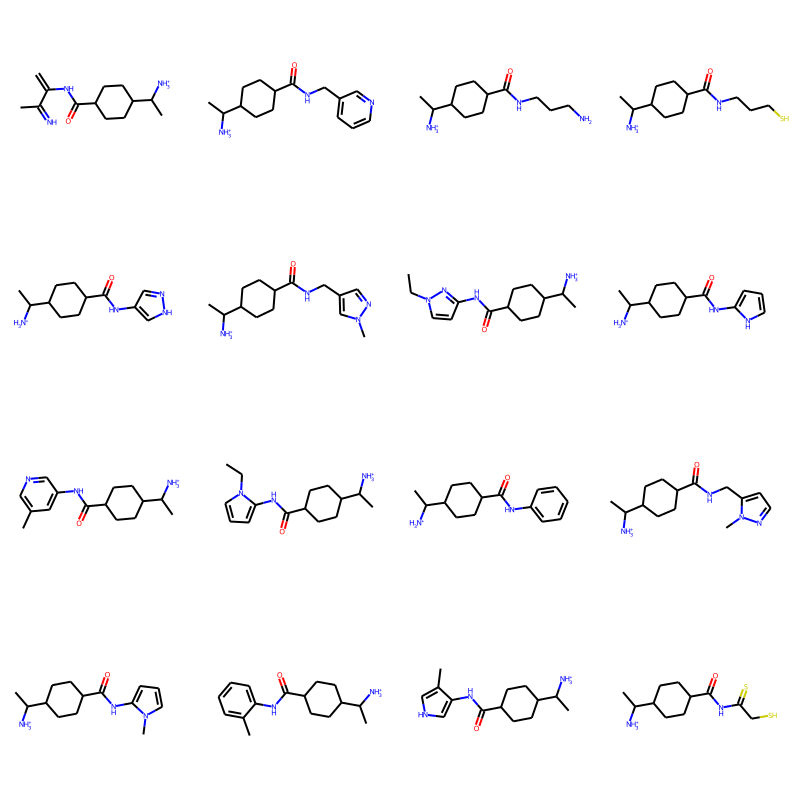

In [8]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in ranked_elabs['smiles'].drop_duplicates().head(16)], molsPerRow = 4)

If we want to, we can view the quasi actives which determined the pharmacophoric profiles used in the refinement phase:

In [9]:
#We can view basic information about each pharmacophoric point

for k in STRIFE_model.hSingles.keys():
    
    print(f'****Pharmacophoric point: {k}****')
    for kk in STRIFE_model.hSingles[k].keys():
        print(f'{kk} : {STRIFE_model.hSingles[k][kk]}')
    
    print('\n')
    

****Pharmacophoric point: 0****
type : Acceptor
position : [3.19117647 9.76470588 4.5       ]
distFromExit : 4.021016157786048
angFromExit : 0.3155533999045561


****Pharmacophoric point: 1****
type : Donor
position : [3.3  9.35 2.2 ]
distFromExit : 4.269065237262134
angFromExit : 0.30498263358684735




In [10]:
#There is a set of quasi-actives for each pharmacophoric point

for k in STRIFE_model.singleQuasiActives.keys():
    print(f'Quasi-Actives for pharmacophoric point {k}:')
    print(STRIFE_model.singleQuasiActives[k])
    print('\n')

Quasi-Actives for pharmacophoric point 0:
                                    smiles  distance
121      CC([NH3+])C1CCC(C(=O)Nc2ccns2)CC1  0.163201
123     CC([NH3+])C1CCC(C(=O)Nc2cncn2C)CC1  0.195680
135   CC([NH3+])C1CCC(C(=O)Nc2cnn(C)c2)CC1  0.261521
162    CC([NH3+])C1CCC(C(=O)NCc2cccnc2)CC1  0.264740
173  CCn1cc(NC(=O)C2CCC(C(C)[NH3+])CC2)cn1  0.274157


Quasi-Actives for pharmacophoric point 1:
                                      smiles  distance
103  Cc1cc(NC(=O)C2CCC(C(C)[NH3+])CC2)c[nH]1  0.106721
92     Cc1c[nH]cc1NC(=O)C1CCC(C(C)[NH3+])CC1  0.222244
82      CC([NH3+])C1CCC(C(=O)Nc2cc[nH]c2)CC1  0.229487
21          CC(N)CNC(=O)C1CCC(C(C)[NH3+])CC1  0.276648
73       CC([NH3+])C1CCC(C(=O)NCCC[NH3+])CC1  0.324776




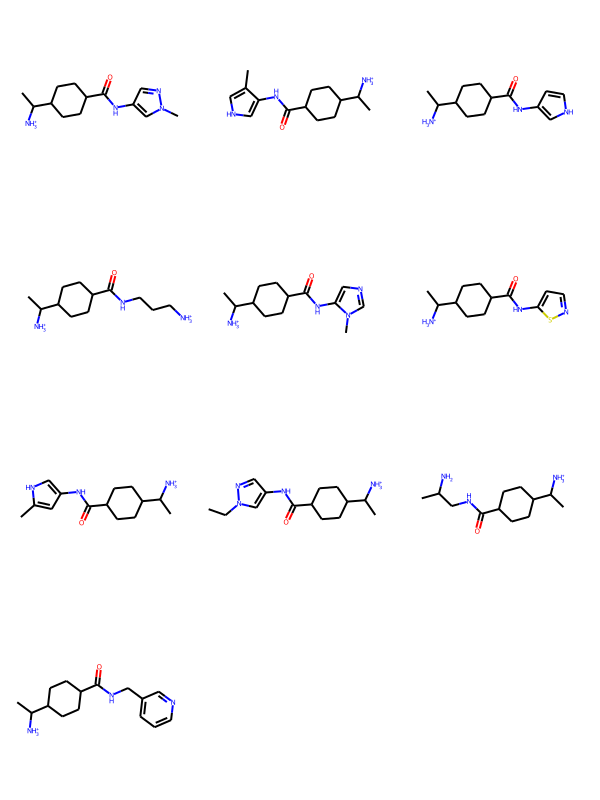

In [11]:
all_quasi_actives = []

for k in STRIFE_model.singleQuasiActives.keys():
    all_quasi_actives = all_quasi_actives + list(STRIFE_model.singleQuasiActives[k]['smiles'])

all_quasi_actives = list(set(all_quasi_actives))
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in all_quasi_actives])

### Accessing the docked poses

STRIFE saves the docked poses in the ```output_directory``` under the name ```pharmsElabsTestDocked.sdf```. You can view them in the binding pocket using a molecule viewer such as PyMol

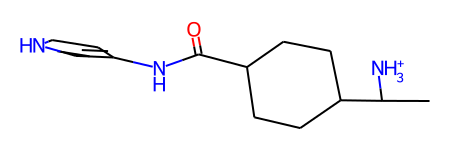

In [12]:
docked_mols = Chem.SDMolSupplier(f'{args.output_directory}/pharmsElabsTestDocked.sdf')
docked_mols[0] #A 2D depiction of one of the docked mols